<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1304_DeepLearning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
from torch.autograd import Variable

import matplotlib.pyplot as plt

False

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
)

In [8]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [9]:
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


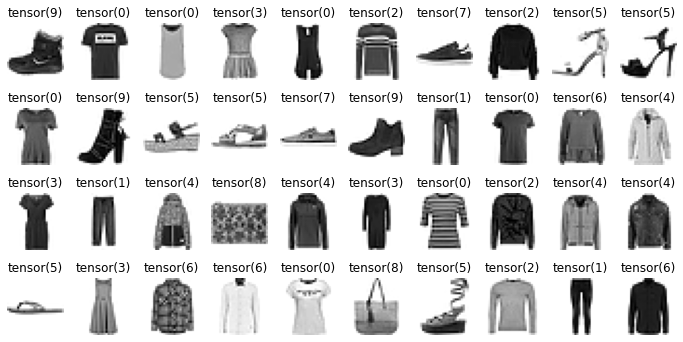

In [14]:
fig = plt.figure(figsize=(12, 6))
for i, im in enumerate(train_data.data[:40]):
    a = fig.add_subplot(4, 10, i + 1)
    plt.axis('off')
    plt.imshow(im, cmap='gray_r')
    plt.title(train_data.targets[i])
plt.show()

In [16]:
loaders = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fbdc17c0810>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fbdc37c6150>}

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1,
                                             out_channels=32,
                                             kernel_size=3),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2))
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=32,
                                             out_channels=64,
                                             kernel_size=3),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2))
        self.out = nn.Linear(64 * 5 * 5, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x


In [19]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1600, out_features=10, bias=True)
)


In [20]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [22]:
optimizer = optim.Adam(cnn.parameters(), lr=0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [27]:
def train(num_epochs, cnn, loaders):
    cnn.train()
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            b_x = Variable(images)
            b_y = Variable(labels)
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Step {i+1}/{total_step}, loss: {loss.item()}")


In [28]:
num_epochs = 15
train(num_epochs, cnn, loaders)

Epoch 1/15, Step 100/600, loss: 0.5925571918487549
Epoch 1/15, Step 200/600, loss: 0.5167321562767029
Epoch 1/15, Step 300/600, loss: 0.4415653645992279
Epoch 1/15, Step 400/600, loss: 0.23945316672325134
Epoch 1/15, Step 500/600, loss: 0.5307336449623108
Epoch 1/15, Step 600/600, loss: 0.27299413084983826
Epoch 2/15, Step 100/600, loss: 0.26441073417663574
Epoch 2/15, Step 200/600, loss: 0.35159847140312195
Epoch 2/15, Step 300/600, loss: 0.22808383405208588
Epoch 2/15, Step 400/600, loss: 0.34697532653808594
Epoch 2/15, Step 500/600, loss: 0.3753868043422699
Epoch 2/15, Step 600/600, loss: 0.3725769817829132
Epoch 3/15, Step 100/600, loss: 0.37845519185066223
Epoch 3/15, Step 200/600, loss: 0.38042765855789185
Epoch 3/15, Step 300/600, loss: 0.30958297848701477
Epoch 3/15, Step 400/600, loss: 0.29940682649612427
Epoch 3/15, Step 500/600, loss: 0.29459264874458313
Epoch 3/15, Step 600/600, loss: 0.45841893553733826
Epoch 4/15, Step 100/600, loss: 0.3705114424228668
Epoch 4/15, Step 20

In [31]:
def test():
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / labels.size(0)

    print(f"Test Accuracy: {accuracy}")

In [32]:
test()

Test Accuracy: 0.87
